# IK Data Collection Visualization and Analysis

This notebook provides comprehensive visualization and analysis of the inverse kinematics data collection results from `IK_Data_Collection_and_Validation.py`.

## Sections:
1. **Data Loading & Overview** - Load CSV and basic statistics
2. **Success Rate Analysis** - IK success rates by workspace zone
3. **Position Accuracy** - Measured vs target position errors
4. **Workspace Coverage** - 3D visualization of tested points
5. **Joint Utilization** - Joint angle usage patterns
6. **Performance Metrics** - Computation time and iterations
7. **Error Analysis** - Position and orientation error distributions

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading & Overview

In [14]:
# Load the data - adjust the path to your CSV file
csv_path = Path("Lab4/robot0_data.csv")  # Change this to your actual file path

if csv_path.exists():
    df = pd.read_csv(csv_path)
    print(f"✓ Data loaded successfully!")
    print(f"Total records: {len(df)}")
    print(f"\nDataframe shape: {df.shape}")
    print(f"\nColumn names:")
    print(df.columns.tolist())
else:
    print(f"❌ File not found: {csv_path}")
    print("Please update the csv_path variable to point to your data file.")

✓ Data loaded successfully!
Total records: 40

Dataframe shape: (40, 62)

Column names:
['robot_id', 'test_id', 'zone', 'timestamp', 'target_x', 'target_y', 'target_z', 'target_rx', 'target_ry', 'target_rz', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q_init_1', 'q_init_2', 'q_init_3', 'q_init_4', 'q_init_5', 'q_init_6', 'fk_x', 'fk_y', 'fk_z', 'fk_rx', 'fk_ry', 'fk_rz', 'fk_pos_error', 'fk_ori_error', 'ik_success', 'ik_iterations', 'ik_time_sec', 'ik_residual', 'radial_distance', 'proximity_to_limits', 'executed', 'movement_detected', 'movement_attempted', 'retry_attempted', 'warnings', 'meas_x', 'meas_y', 'meas_z', 'meas_rx', 'meas_ry', 'meas_rz', 'meas_j1', 'meas_j2', 'meas_j3', 'meas_j4', 'meas_j5', 'meas_j6', 'meas_pos_error', 'meas_ori_error', 'total_time_sec', 'joint_1_util', 'joint_2_util', 'joint_3_util', 'joint_4_util', 'joint_5_util', 'joint_6_util']


In [15]:
# Display basic statistics
print("=== DATASET OVERVIEW ===\n")
print(f"Robot ID: {df['robot_id'].iloc[0] if 'robot_id' in df.columns else 'N/A'}")
print(f"Total test cases: {len(df)}")
print(f"IK Success rate: {df['ik_success'].mean()*100:.1f}%")
print(f"Executed tests: {df['executed'].sum()} ({df['executed'].mean()*100:.1f}%)")
print(f"Movement detected: {df['movement_detected'].sum() if 'movement_detected' in df.columns else 'N/A'}")

print("\n=== WORKSPACE ZONES ===")
if 'zone' in df.columns:
    print(df['zone'].value_counts().sort_index())

print("\n=== FIRST FEW ROWS ===")
df.head()

=== DATASET OVERVIEW ===

Robot ID: 0
Total test cases: 40
IK Success rate: 100.0%
Executed tests: 32 (80.0%)
Movement detected: 32

=== WORKSPACE ZONES ===
zone
far    19
mid    21
Name: count, dtype: int64

=== FIRST FEW ROWS ===


,robot_id,test_id,zone,timestamp,target_x,target_y,target_z,target_rx,target_ry,target_rz,...,meas_j6,meas_pos_error,meas_ori_error,total_time_sec,joint_1_util,joint_2_util,joint_3_util,joint_4_util,joint_5_util,joint_6_util
0,0,0,mid,2025-11-12T12:39:43.169808,100.0,0.0,173.205081,0,0,0,...,-11.60,31.012815,181.469386,4.706109,61.253628,53.238588,100.000000,12.490769,100.0,45.407530
1,0,1,mid,2025-11-12T12:39:54.230654,100.0,0.0,173.205081,0,45,0,...,-11.77,79.752023,209.469723,11.056178,61.516724,53.160063,100.000000,12.986845,100.0,44.064908
2,0,2,mid,2025-11-12T12:40:05.304823,100.0,0.0,173.205081,0,-45,0,...,89.73,26.542400,189.556427,11.070266,62.302672,54.261925,94.967686,19.360633,100.0,80.461288
3,0,3,mid,2025-11-12T12:40:16.577100,100.0,0.0,173.205081,45,0,0,...,46.84,26.244751,199.456217,11.267578,62.372679,54.103630,95.411258,18.964045,100.0,62.547102
4,0,4,mid,2025-11-12T12:40:27.852741,100.0,0.0,173.205081,-45,0,0,...,-31.64,35.170736,212.545647,11.269920,37.627446,54.103119,95.414058,81.035338,100.0,37.451012


## 2. Success Rate Analysis

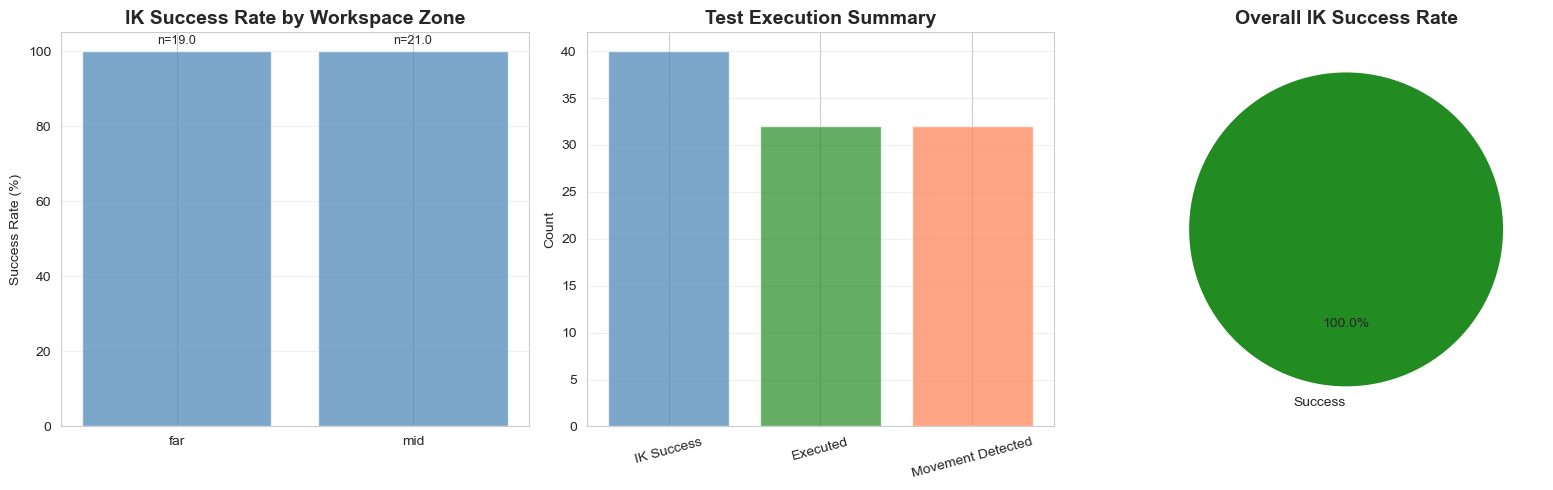

In [16]:
# Success rates by workspace zone
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# IK Success by Zone
if 'zone' in df.columns:
    zone_success = df.groupby('zone')['ik_success'].agg(['mean', 'count'])
    zone_success['mean'] *= 100
    
    axes[0].bar(zone_success.index, zone_success['mean'], color='steelblue', alpha=0.7)
    axes[0].set_title('IK Success Rate by Workspace Zone', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Success Rate (%)')
    axes[0].set_ylim([0, 105])
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, (idx, row) in enumerate(zone_success.iterrows()):
        axes[0].text(i, row['mean'] + 2, f"n={row['count']}", ha='center', fontsize=9)

# Execution Success
execution_data = pd.DataFrame({
    'Status': ['IK Success', 'Executed', 'Movement Detected'],
    'Count': [
        df['ik_success'].sum(),
        df['executed'].sum(),
        df['movement_detected'].sum() if 'movement_detected' in df.columns else 0
    ]
})

axes[1].bar(execution_data['Status'], execution_data['Count'], 
            color=['steelblue', 'forestgreen', 'coral'], alpha=0.7)
axes[1].set_title('Test Execution Summary', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)

# Success vs Failure Pie Chart
success_counts = df['ik_success'].value_counts()
labels = ['Success' if idx else 'Failed' for idx in success_counts.index]
colors = ['forestgreen' if idx else 'coral' for idx in success_counts.index]
axes[2].pie(success_counts.values, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[2].set_title('Overall IK Success Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Position Accuracy Analysis

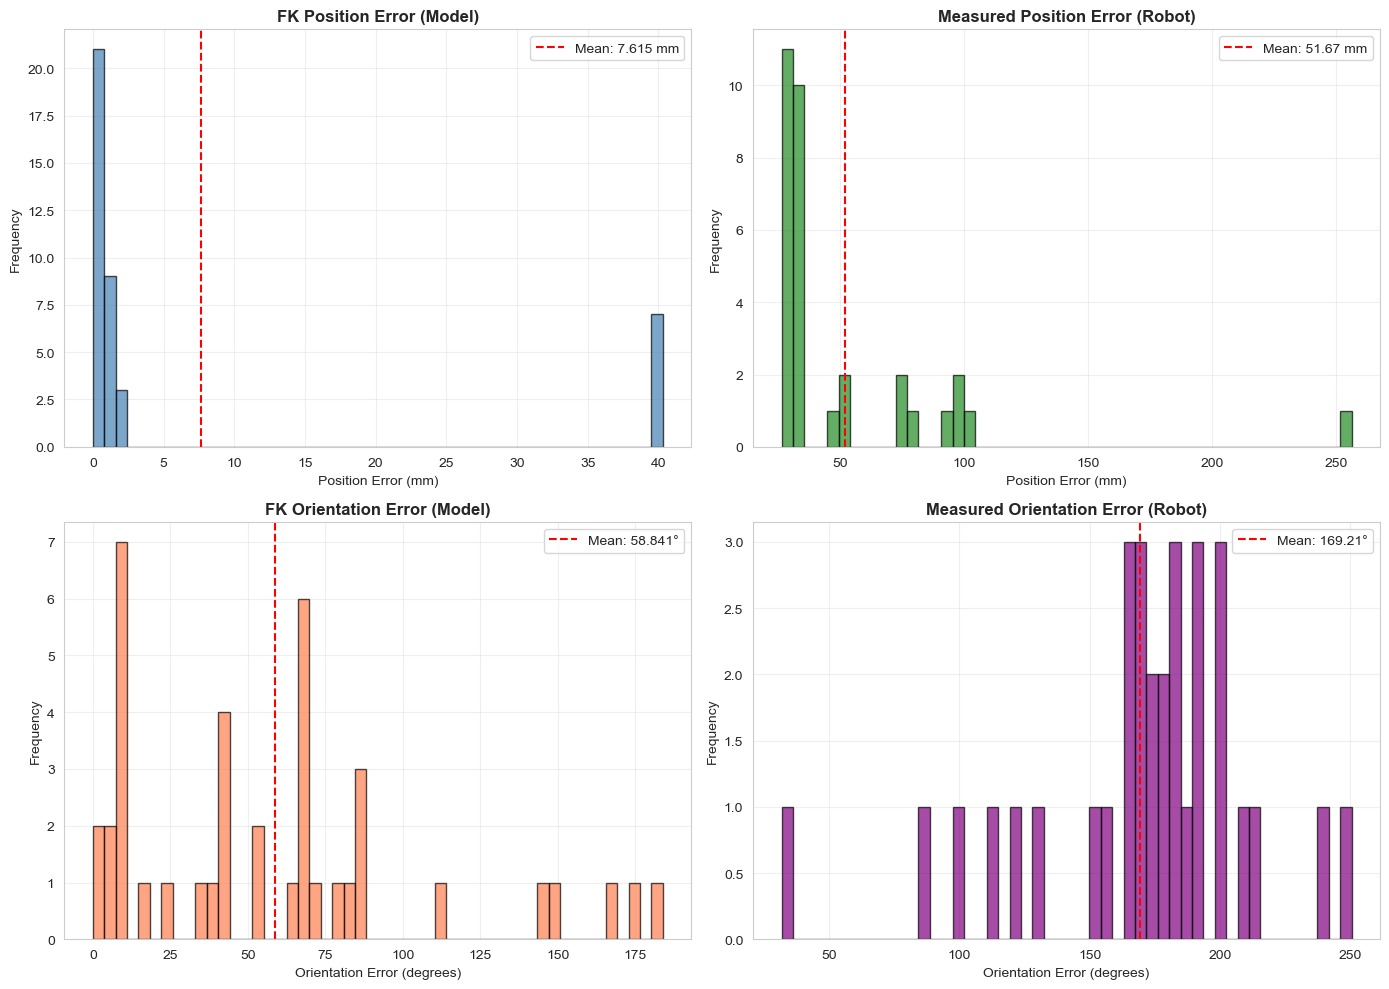


=== ERROR STATISTICS ===

FK Position Error (mm): Mean=7.6154, Std=15.1212, Max=40.3153

Measured Position Error (mm): Mean=51.67, Std=44.41, Max=256.14


In [17]:
# Position and orientation error analysis
executed_df = df[df['executed'] == True].copy()

if len(executed_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # FK Position Error Distribution
    axes[0, 0].hist(df[df['ik_success']]['fk_pos_error'], bins=50, 
                    color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('FK Position Error (Model)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Position Error (mm)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df[df['ik_success']]['fk_pos_error'].mean(), 
                       color='red', linestyle='--', label=f"Mean: {df[df['ik_success']]['fk_pos_error'].mean():.3f} mm")
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Measured Position Error Distribution
    if 'meas_pos_error' in executed_df.columns:
        valid_meas = executed_df[executed_df['meas_pos_error'] > 0]
        axes[0, 1].hist(valid_meas['meas_pos_error'], bins=50, 
                        color='forestgreen', alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Measured Position Error (Robot)', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Position Error (mm)')
        axes[0, 1].set_ylabel('Frequency')
        if len(valid_meas) > 0:
            axes[0, 1].axvline(valid_meas['meas_pos_error'].mean(), 
                              color='red', linestyle='--', 
                              label=f"Mean: {valid_meas['meas_pos_error'].mean():.2f} mm")
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
    
    # FK Orientation Error Distribution
    axes[1, 0].hist(df[df['ik_success']]['fk_ori_error'], bins=50, 
                    color='coral', alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('FK Orientation Error (Model)', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Orientation Error (degrees)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(df[df['ik_success']]['fk_ori_error'].mean(), 
                       color='red', linestyle='--', 
                       label=f"Mean: {df[df['ik_success']]['fk_ori_error'].mean():.3f}°")
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Measured Orientation Error Distribution
    if 'meas_ori_error' in executed_df.columns:
        valid_meas_ori = executed_df[executed_df['meas_ori_error'] > 0]
        axes[1, 1].hist(valid_meas_ori['meas_ori_error'], bins=50, 
                        color='purple', alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('Measured Orientation Error (Robot)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Orientation Error (degrees)')
        axes[1, 1].set_ylabel('Frequency')
        if len(valid_meas_ori) > 0:
            axes[1, 1].axvline(valid_meas_ori['meas_ori_error'].mean(), 
                              color='red', linestyle='--', 
                              label=f"Mean: {valid_meas_ori['meas_ori_error'].mean():.2f}°")
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\n=== ERROR STATISTICS ===")
    print(f"\nFK Position Error (mm): Mean={df[df['ik_success']]['fk_pos_error'].mean():.4f}, "
          f"Std={df[df['ik_success']]['fk_pos_error'].std():.4f}, "
          f"Max={df[df['ik_success']]['fk_pos_error'].max():.4f}")
    
    if len(valid_meas) > 0:
        print(f"\nMeasured Position Error (mm): Mean={valid_meas['meas_pos_error'].mean():.2f}, "
              f"Std={valid_meas['meas_pos_error'].std():.2f}, "
              f"Max={valid_meas['meas_pos_error'].max():.2f}")
else:
    print("No executed tests found in the dataset.")

## 4. 3D Workspace Visualization

In [18]:
# 3D visualization of target positions colored by success
successful = df[df['ik_success'] == True]
failed = df[df['ik_success'] == False]

fig = go.Figure()

# Successful points
fig.add_trace(go.Scatter3d(
    x=successful['target_x'],
    y=successful['target_y'],
    z=successful['target_z'],
    mode='markers',
    marker=dict(size=4, color='green', opacity=0.6),
    name='IK Success',
    text=[f"Test {tid}<br>Zone: {zone}" for tid, zone in zip(successful['test_id'], successful['zone'])],
    hovertemplate='<b>%{text}</b><br>X: %{x:.1f}<br>Y: %{y:.1f}<br>Z: %{z:.1f}<extra></extra>'
))

# Failed points
if len(failed) > 0:
    fig.add_trace(go.Scatter3d(
        x=failed['target_x'],
        y=failed['target_y'],
        z=failed['target_z'],
        mode='markers',
        marker=dict(size=6, color='red', opacity=0.8, symbol='x'),
        name='IK Failed',
        text=[f"Test {tid}<br>Zone: {zone}" for tid, zone in zip(failed['test_id'], failed['zone'])],
        hovertemplate='<b>%{text}</b><br>X: %{x:.1f}<br>Y: %{y:.1f}<br>Z: %{z:.1f}<extra></extra>'
    ))

fig.update_layout(
    title='3D Workspace Coverage - Target Positions',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'
    ),
    width=900,
    height=700
)

fig.show()

In [19]:
# 3D visualization of measured positions (for executed tests) with position error
if len(executed_df) > 0 and 'meas_x' in executed_df.columns:
    executed_valid = executed_df[executed_df['meas_pos_error'] > 0].copy()
    
    if len(executed_valid) > 0:
        fig = go.Figure()
        
        # Color by position error
        fig.add_trace(go.Scatter3d(
            x=executed_valid['meas_x'],
            y=executed_valid['meas_y'],
            z=executed_valid['meas_z'],
            mode='markers',
            marker=dict(
                size=5,
                color=executed_valid['meas_pos_error'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Position<br>Error (mm)"),
                opacity=0.7
            ),
            name='Measured Positions',
            text=[f"Test {tid}<br>Error: {err:.2f} mm" 
                  for tid, err in zip(executed_valid['test_id'], executed_valid['meas_pos_error'])],
            hovertemplate='<b>%{text}</b><br>X: %{x:.1f}<br>Y: %{y:.1f}<br>Z: %{z:.1f}<extra></extra>'
        ))
        
        fig.update_layout(
            title='3D Workspace - Measured Positions (colored by position error)',
            scene=dict(
                xaxis_title='X (mm)',
                yaxis_title='Y (mm)',
                zaxis_title='Z (mm)',
                aspectmode='data'
            ),
            width=900,
            height=700
        )
        
        fig.show()
    else:
        print("No valid measured positions to display")
else:
    print("No executed tests with measured positions found")

## 5. Joint Utilization Analysis

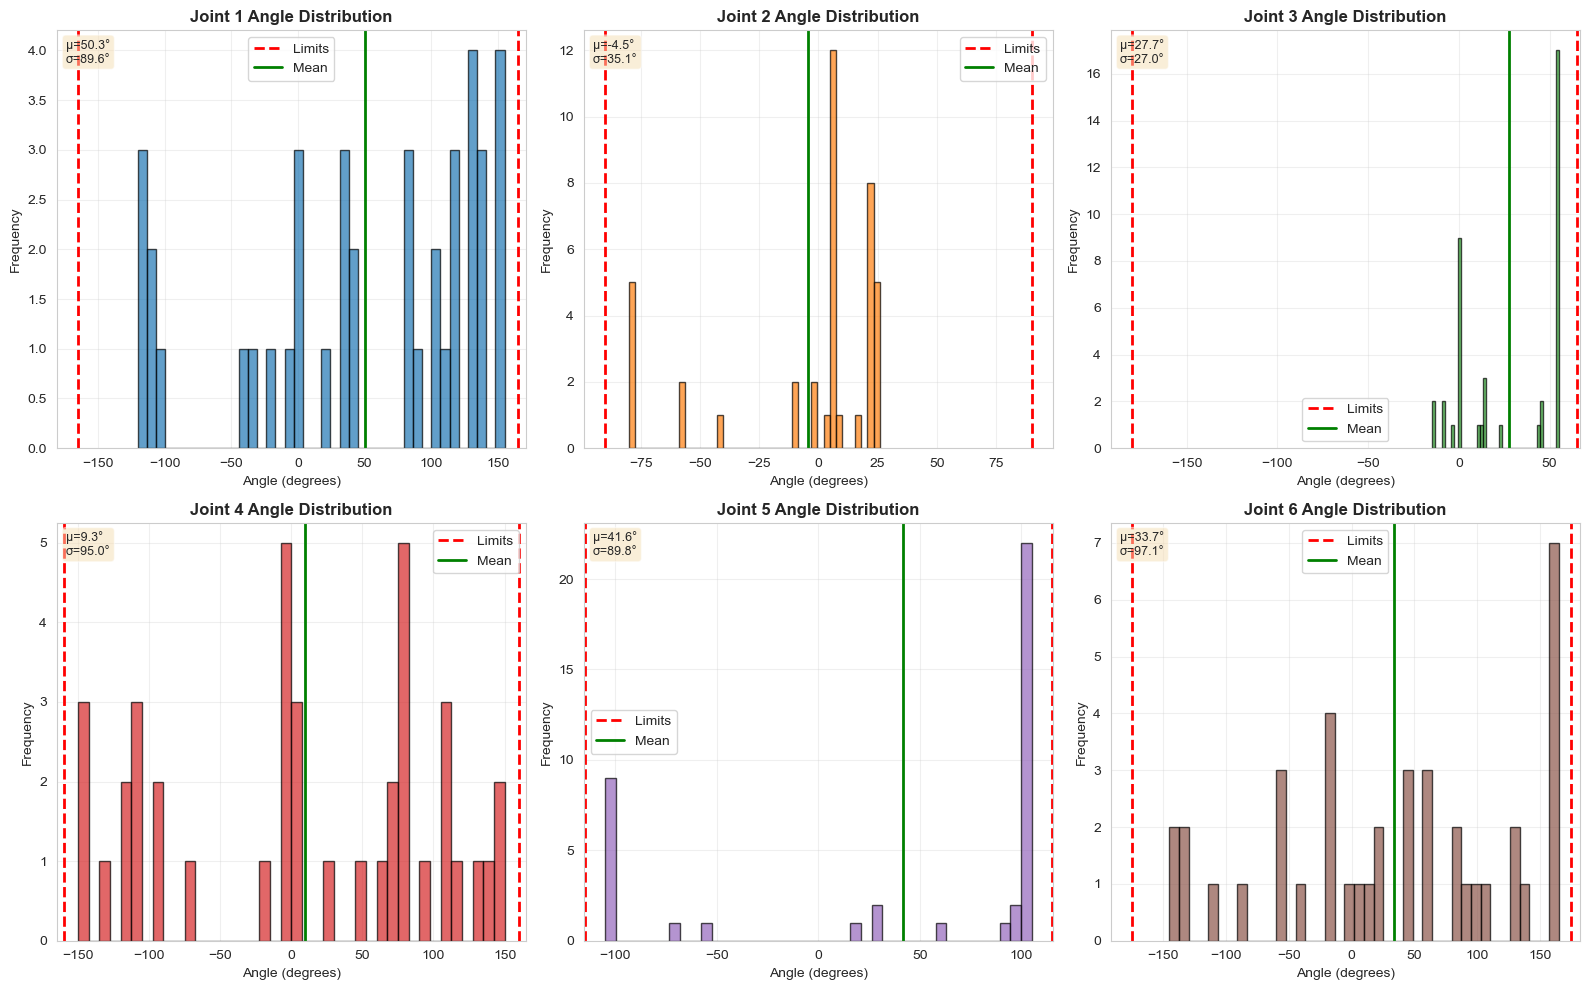

In [20]:
# Joint angle distributions
joint_cols = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
joint_limits = [(-165, 165), (-90, 90), (-180, 65), (-160, 160), (-115, 115), (-175, 175)]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, (col, limits) in enumerate(zip(joint_cols, joint_limits)):
    if col in df.columns:
        axes[i].hist(df[df['ik_success']][col], bins=40, 
                    color=f'C{i}', alpha=0.7, edgecolor='black')
        axes[i].axvline(limits[0], color='red', linestyle='--', linewidth=2, label='Limits')
        axes[i].axvline(limits[1], color='red', linestyle='--', linewidth=2)
        axes[i].axvline(df[df['ik_success']][col].mean(), 
                       color='green', linestyle='-', linewidth=2, label='Mean')
        axes[i].set_title(f'Joint {i+1} Angle Distribution', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Angle (degrees)')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(alpha=0.3)
        
        # Add statistics
        mean_val = df[df['ik_success']][col].mean()
        std_val = df[df['ik_success']][col].std()
        axes[i].text(0.02, 0.98, f'μ={mean_val:.1f}°\nσ={std_val:.1f}°', 
                    transform=axes[i].transAxes, fontsize=9,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

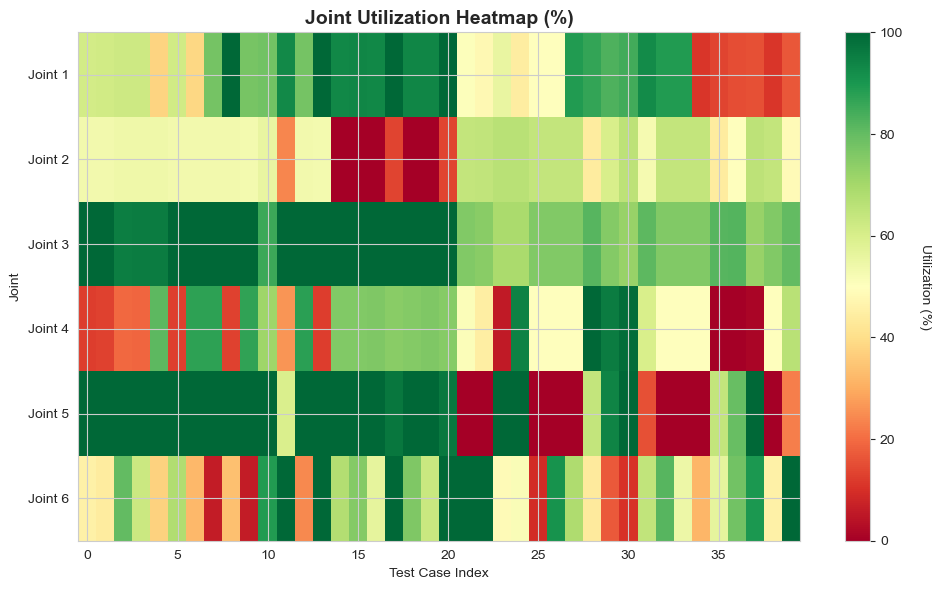


=== JOINT UTILIZATION STATISTICS ===
Joint 1: Mean=66.2%, Std=28.9%
Joint 2: Mean=47.2%, Std=21.9%
Joint 3: Mean=87.9%, Std=12.0%
Joint 4: Mean=53.1%, Std=31.7%
Joint 5: Mean=69.8%, Std=42.8%
Joint 6: Mean=60.2%, Std=29.4%


In [21]:
# Joint utilization heatmap
util_cols = [f'joint_{i}_util' for i in range(1, 7)]
if all(col in df.columns for col in util_cols):
    util_data = df[df['ik_success']][util_cols].values
    
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(util_data.T, aspect='auto', cmap='RdYlGn', vmin=0, vmax=100)
    
    ax.set_yticks(range(6))
    ax.set_yticklabels([f'Joint {i}' for i in range(1, 7)])
    ax.set_xlabel('Test Case Index')
    ax.set_ylabel('Joint')
    ax.set_title('Joint Utilization Heatmap (%)', fontsize=14, fontweight='bold')
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Utilization (%)', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print utilization statistics
    print("\n=== JOINT UTILIZATION STATISTICS ===")
    for i, col in enumerate(util_cols, 1):
        mean_util = df[df['ik_success']][col].mean()
        std_util = df[df['ik_success']][col].std()
        print(f"Joint {i}: Mean={mean_util:.1f}%, Std={std_util:.1f}%")

## 6. Performance Metrics

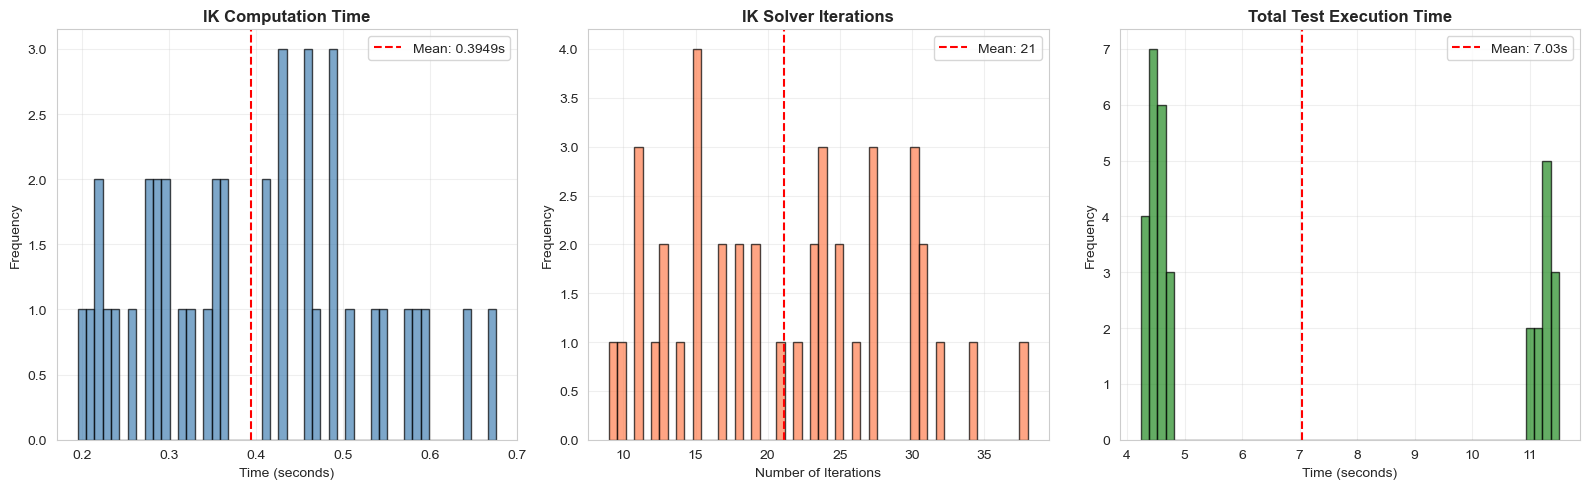


=== PERFORMANCE STATISTICS ===
IK Computation Time: Mean=0.3949s, Std=0.1294s, Max=0.6763s
IK Iterations: Mean=21.1, Std=7.6, Max=38
Total Test Time: Mean=7.03s, Std=3.33s, Max=11.51s


In [22]:
# IK computation time and iterations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# IK computation time
if 'ik_time_sec' in df.columns:
    axes[0].hist(df[df['ik_success']]['ik_time_sec'], bins=50, 
                color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_title('IK Computation Time', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Time (seconds)')
    axes[0].set_ylabel('Frequency')
    mean_time = df[df['ik_success']]['ik_time_sec'].mean()
    axes[0].axvline(mean_time, color='red', linestyle='--', 
                   label=f'Mean: {mean_time:.4f}s')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

# IK iterations
if 'ik_iterations' in df.columns:
    axes[1].hist(df[df['ik_success']]['ik_iterations'], bins=50, 
                color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_title('IK Solver Iterations', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Frequency')
    mean_iter = df[df['ik_success']]['ik_iterations'].mean()
    axes[1].axvline(mean_iter, color='red', linestyle='--', 
                   label=f'Mean: {mean_iter:.0f}')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

# Total test time
if 'total_time_sec' in df.columns:
    axes[2].hist(df[df['executed']]['total_time_sec'], bins=50, 
                color='forestgreen', alpha=0.7, edgecolor='black')
    axes[2].set_title('Total Test Execution Time', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Frequency')
    mean_total = df[df['executed']]['total_time_sec'].mean()
    axes[2].axvline(mean_total, color='red', linestyle='--', 
                   label=f'Mean: {mean_total:.2f}s')
    axes[2].legend()
    axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance statistics
print("\n=== PERFORMANCE STATISTICS ===")
if 'ik_time_sec' in df.columns:
    print(f"IK Computation Time: Mean={df[df['ik_success']]['ik_time_sec'].mean():.4f}s, "
          f"Std={df[df['ik_success']]['ik_time_sec'].std():.4f}s, "
          f"Max={df[df['ik_success']]['ik_time_sec'].max():.4f}s")
if 'ik_iterations' in df.columns:
    print(f"IK Iterations: Mean={df[df['ik_success']]['ik_iterations'].mean():.1f}, "
          f"Std={df[df['ik_success']]['ik_iterations'].std():.1f}, "
          f"Max={df[df['ik_success']]['ik_iterations'].max():.0f}")
if 'total_time_sec' in df.columns and df['executed'].sum() > 0:
    print(f"Total Test Time: Mean={df[df['executed']]['total_time_sec'].mean():.2f}s, "
          f"Std={df[df['executed']]['total_time_sec'].std():.2f}s, "
          f"Max={df[df['executed']]['total_time_sec'].max():.2f}s")

## 7. Error Analysis by Workspace Zone

/var/folders/rf/hk4qty490ql3hm_l2qys9ffh0000gn/T/ipykernel_47049/2852689687.py:13: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/rf/hk4qty490ql3hm_l2qys9ffh0000gn/T/ipykernel_47049/2852689687.py:28: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/rf/hk4qty490ql3hm_l2qys9ffh0000gn/T/ipykernel_47049/2852689687.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/rf/hk4qty490ql3hm_l2qys9ffh0000gn/T/ipykernel_47049/2852689687.py:55: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dr

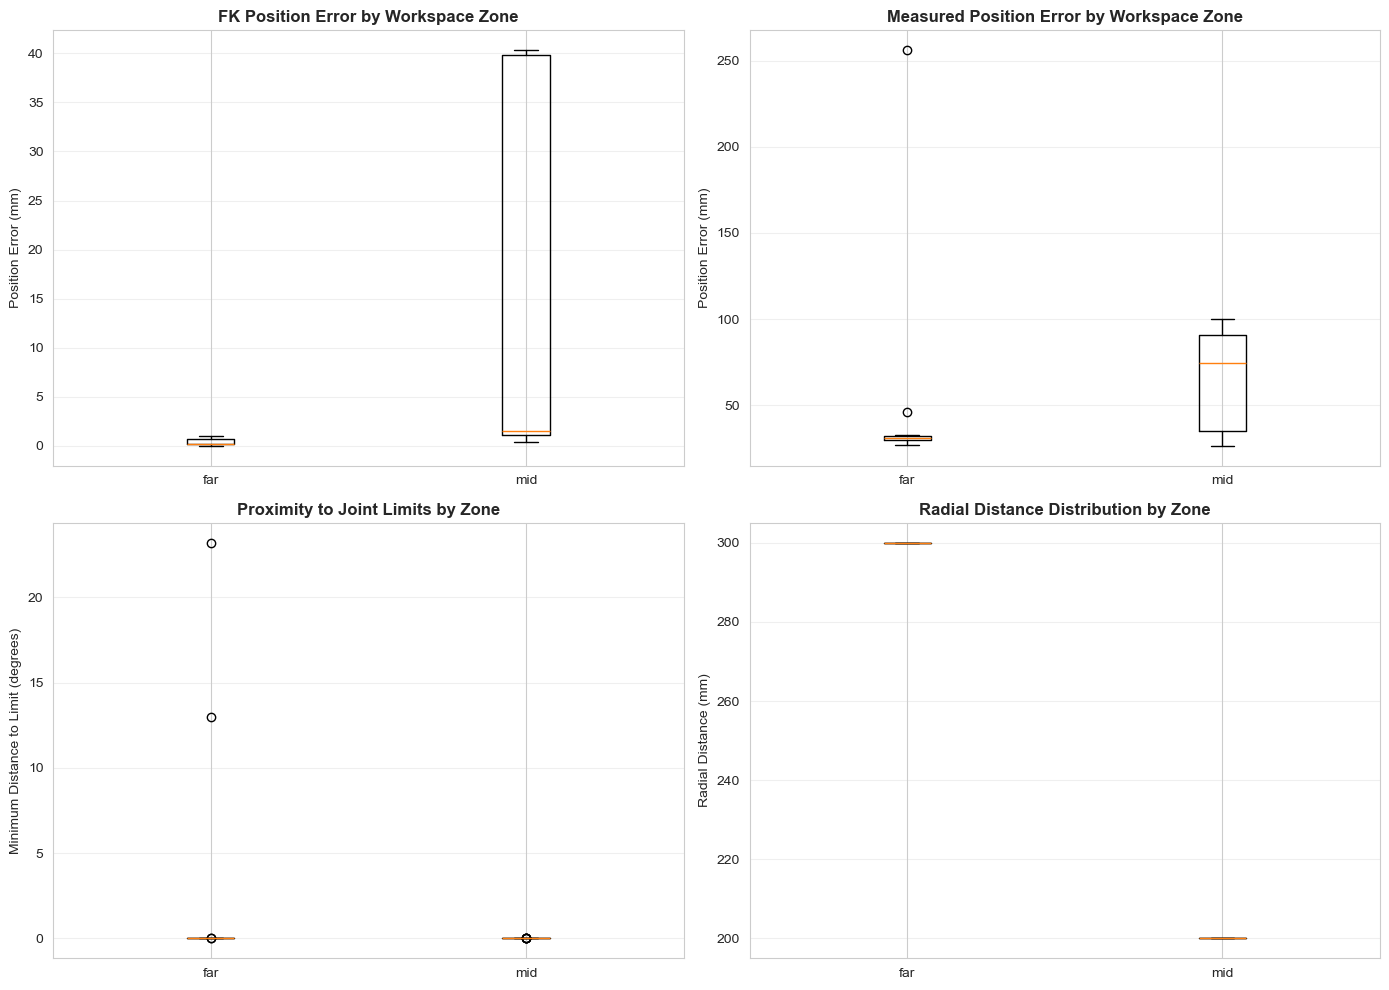


=== ERROR STATISTICS BY ZONE ===

FAR Zone (n=19):
  FK Position Error: Mean=0.3438 mm, Std=0.3193 mm
  Proximity to Limits: Mean=1.9°, Min=0.0°

MID Zone (n=21):
  FK Position Error: Mean=14.1945 mm, Std=18.7109 mm
  Proximity to Limits: Mean=0.0°, Min=0.0°


In [23]:
# Error analysis by workspace zone
if 'zone' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # FK Position Error by Zone
    zone_data = []
    zones = sorted(df['zone'].unique())
    
    for zone in zones:
        zone_df = df[(df['zone'] == zone) & (df['ik_success'])]
        zone_data.append(zone_df['fk_pos_error'].values)
    
    axes[0, 0].boxplot(zone_data, labels=zones)
    axes[0, 0].set_title('FK Position Error by Workspace Zone', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Position Error (mm)')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Measured Position Error by Zone (if available)
    if len(executed_df) > 0 and 'meas_pos_error' in executed_df.columns:
        zone_meas_data = []
        for zone in zones:
            zone_df = executed_df[(executed_df['zone'] == zone) & (executed_df['meas_pos_error'] > 0)]
            if len(zone_df) > 0:
                zone_meas_data.append(zone_df['meas_pos_error'].values)
            else:
                zone_meas_data.append([])
        
        axes[0, 1].boxplot([d for d in zone_meas_data if len(d) > 0], 
                          labels=[z for z, d in zip(zones, zone_meas_data) if len(d) > 0])
        axes[0, 1].set_title('Measured Position Error by Workspace Zone', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Position Error (mm)')
        axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Proximity to limits by zone
    zone_prox_data = []
    for zone in zones:
        zone_df = df[(df['zone'] == zone) & (df['ik_success'])]
        if 'proximity_to_limits' in zone_df.columns:
            zone_prox_data.append(zone_df['proximity_to_limits'].values)
    
    if zone_prox_data:
        axes[1, 0].boxplot(zone_prox_data, labels=zones)
        axes[1, 0].set_title('Proximity to Joint Limits by Zone', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Minimum Distance to Limit (degrees)')
        axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Radial distance distribution by zone
    zone_radial_data = []
    for zone in zones:
        zone_df = df[(df['zone'] == zone) & (df['ik_success'])]
        if 'radial_distance' in zone_df.columns:
            zone_radial_data.append(zone_df['radial_distance'].values)
    
    if zone_radial_data:
        axes[1, 1].boxplot(zone_radial_data, labels=zones)
        axes[1, 1].set_title('Radial Distance Distribution by Zone', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Radial Distance (mm)')
        axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print zone statistics
    print("\n=== ERROR STATISTICS BY ZONE ===")
    for zone in zones:
        zone_df = df[(df['zone'] == zone) & (df['ik_success'])]
        if len(zone_df) > 0:
            print(f"\n{zone.upper()} Zone (n={len(zone_df)}):")
            print(f"  FK Position Error: Mean={zone_df['fk_pos_error'].mean():.4f} mm, "
                  f"Std={zone_df['fk_pos_error'].std():.4f} mm")
            if 'proximity_to_limits' in zone_df.columns:
                print(f"  Proximity to Limits: Mean={zone_df['proximity_to_limits'].mean():.1f}°, "
                      f"Min={zone_df['proximity_to_limits'].min():.1f}°")

## 8. Summary Report

In [24]:
# Generate comprehensive summary report
print("="*70)
print("IK DATA COLLECTION - COMPREHENSIVE SUMMARY REPORT")
print("="*70)

print("\n📊 DATASET OVERVIEW")
print(f"  • Robot ID: {df['robot_id'].iloc[0] if 'robot_id' in df.columns else 'N/A'}")
print(f"  • Total test cases: {len(df)}")
print(f"  • Date range: {df['timestamp'].min() if 'timestamp' in df.columns else 'N/A'}")
print(f"             to {df['timestamp'].max() if 'timestamp' in df.columns else 'N/A'}")

print("\n✅ SUCCESS RATES")
print(f"  • IK Success: {df['ik_success'].sum()} / {len(df)} ({df['ik_success'].mean()*100:.1f}%)")
print(f"  • Executed: {df['executed'].sum()} / {len(df)} ({df['executed'].mean()*100:.1f}%)")
if 'movement_detected' in df.columns:
    print(f"  • Movement Detected: {df['movement_detected'].sum()} / {df['executed'].sum()} "
          f"({df[df['executed']]['movement_detected'].mean()*100:.1f}% of executed)")

print("\n🎯 ACCURACY METRICS (Model - FK)")
successful = df[df['ik_success']]
print(f"  • Position Error: μ={successful['fk_pos_error'].mean():.4f} mm, "
      f"σ={successful['fk_pos_error'].std():.4f} mm, "
      f"max={successful['fk_pos_error'].max():.4f} mm")
print(f"  • Orientation Error: μ={successful['fk_ori_error'].mean():.4f}°, "
      f"σ={successful['fk_ori_error'].std():.4f}°, "
      f"max={successful['fk_ori_error'].max():.4f}°")

if len(executed_df) > 0 and 'meas_pos_error' in executed_df.columns:
    valid_meas = executed_df[executed_df['meas_pos_error'] > 0]
    if len(valid_meas) > 0:
        print("\n🤖 ACCURACY METRICS (Robot - Measured)")
        print(f"  • Position Error: μ={valid_meas['meas_pos_error'].mean():.2f} mm, "
              f"σ={valid_meas['meas_pos_error'].std():.2f} mm, "
              f"max={valid_meas['meas_pos_error'].max():.2f} mm")
        print(f"  • Orientation Error: μ={valid_meas['meas_ori_error'].mean():.2f}°, "
              f"σ={valid_meas['meas_ori_error'].std():.2f}°, "
              f"max={valid_meas['meas_ori_error'].max():.2f}°")

print("\n⚡ PERFORMANCE METRICS")
if 'ik_time_sec' in df.columns:
    print(f"  • IK Computation Time: μ={successful['ik_time_sec'].mean():.4f}s, "
          f"max={successful['ik_time_sec'].max():.4f}s")
if 'ik_iterations' in df.columns:
    print(f"  • IK Iterations: μ={successful['ik_iterations'].mean():.1f}, "
          f"max={successful['ik_iterations'].max():.0f}")
if 'total_time_sec' in df.columns and df['executed'].sum() > 0:
    exec_tests = df[df['executed']]
    print(f"  • Total Test Time: μ={exec_tests['total_time_sec'].mean():.2f}s, "
          f"max={exec_tests['total_time_sec'].max():.2f}s")
    total_runtime = exec_tests['total_time_sec'].sum()
    print(f"  • Total Runtime: {total_runtime/60:.1f} minutes ({total_runtime/3600:.2f} hours)")

print("\n🔧 JOINT UTILIZATION")
for i in range(1, 7):
    col = f'q{i}'
    if col in df.columns:
        joint_vals = successful[col]
        limits = [(-165, 165), (-90, 90), (-180, 65), (-160, 160), (-115, 115), (-175, 175)][i-1]
        print(f"  • Joint {i}: μ={joint_vals.mean():+7.2f}°, "
              f"σ={joint_vals.std():6.2f}°, "
              f"range=[{joint_vals.min():+7.2f}°, {joint_vals.max():+7.2f}°], "
              f"limits=[{limits[0]:+4d}°, {limits[1]:+4d}°]")

if 'zone' in df.columns:
    print("\n🌐 WORKSPACE ZONES")
    for zone in sorted(df['zone'].unique()):
        zone_df = df[df['zone'] == zone]
        zone_success = zone_df['ik_success'].mean() * 100
        print(f"  • {zone.upper()}: {len(zone_df)} tests, {zone_success:.1f}% success")

print("\n" + "="*70)
print("Report generated successfully!")
print("="*70)

IK DATA COLLECTION - COMPREHENSIVE SUMMARY REPORT

📊 DATASET OVERVIEW
  • Robot ID: 0
  • Total test cases: 40
  • Date range: 2025-11-12T12:39:43.169808
             to 2025-11-12T12:44:57.929119

✅ SUCCESS RATES
  • IK Success: 40 / 40 (100.0%)
  • Executed: 32 / 40 (80.0%)
  • Movement Detected: 32 / 32 (100.0% of executed)

🎯 ACCURACY METRICS (Model - FK)
  • Position Error: μ=7.6154 mm, σ=15.1212 mm, max=40.3153 mm
  • Orientation Error: μ=58.8406°, σ=50.3596°, max=183.8952°

🤖 ACCURACY METRICS (Robot - Measured)
  • Position Error: μ=51.67 mm, σ=44.41 mm, max=256.14 mm
  • Orientation Error: μ=169.21°, σ=43.25°, max=250.46°

⚡ PERFORMANCE METRICS
  • IK Computation Time: μ=0.3949s, max=0.6763s
  • IK Iterations: μ=21.1, max=38
  • Total Test Time: μ=7.03s, max=11.51s
  • Total Runtime: 3.8 minutes (0.06 hours)

🔧 JOINT UTILIZATION
  • Joint 1: μ= +50.26°, σ= 89.61°, range=[-120.02°, +155.00°], limits=[-165°, +165°]
  • Joint 2: μ=  -4.45°, σ= 35.06°, range=[ -80.00°,  +26.05°], l